In [1]:
pip install linearmodels

In [2]:
pip install seaborn

In [4]:
# pip install causalgraphicalmodels
# pip install linearmodels

from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

# REPORTE Nº8:

**Nombre: Samantha González Paredes**

**Código: 20193190**

**PARTE1: Lectura**

### The Persistent Effects of Peru's Mining Mita -Dell (2010)

El texto se basa en la mita, un sistema laboral forzado que fue instituido por el gobierno español en Perú y Bolivia en 1573, y abolido en 1812. Históricamente, se sabe que los distritos de Mita tenían menos grandes terratenientes y un nivel educativo más bajo, considerando ello, el texto de Dell se enfoca en encontrar cuáles son los impactos a largo plazo de la mita minera en el desarrollo del Perú contemporáneo. 

El documento avanza en dicha pregunta de investigación partiendo del hecho de que la mita requería que más de 200 comunidades indígenas enviasen una séptima parte de su población masculina adulta a trabajar en la plata de Potosí y Minas de mercurio de Huancavelica, pero hubo un cambio discreto en la contribución de los reclutas de la mita, ya que, de un lado, todas las comunidades enviaron el mismo porcentaje de su población, mientras que por el otro lado, todas las comunidades estaban exentas.
Así, se argumenta que dicho cambio se puede explicar a través de un enfoque de regresión discontinua (RD) para evaluar los efectos a largo plazo de la mita, considerando que el límite de la mita forma una discontinuidad multidimensional en el espacio de longitud-latitud. Tomando en cuenta que la validez del diseño de RD requiere que todos los factores relevantes, además del tratamiento, varíen suavemente en el límite de la mita, la autora se enfoca solo en la porción que transita la cordillera de los Andes en el sur del Perú.

Además, después de examinar los niveles de vida contemporáneos, Dell utiliza datos del Imperio y República Peruana, combinado con el enfoque de RD, para investigar canales de persistencia; enfocándose en los tres más importantes. El primero de ellos tiene que ver con la inexistencia de una élite terrateniente al momento de la promulgación de la mita, ya que ello minimizó la competencia que enfrentó el Estado para acceder a la escasa mano de obra de la mita, promoviendo así la tenencia de la tierra. El segundo es la evidencia que indica que el efecto de la mita redujo históricamente la educación y que los distritos en los que se realizó esta práctica permanecen menos integrados a las redes viales. El tercero son los datos del censo agropecuario que sirven como evidencia de que el impacto a largo plazo de la mita aumenta la prevalencia de la agricultura de subsistencia.

Quizás, la principal fortaleza de este texto es que, usando el enfoque RD y los datos de la encuesta de hogares, se puede estimar que a largo plazo el efecto mita reduce actualmente el consumo de los hogares equivalentes en alrededor de un 25% en los distritos que fueron sometidos. Sin embargo, una de las debilidades del estudio se encuentra en que la encuesta de hogares proporciona poca potencia para estimar modelos flexibles, pero, a pesar de eso, la magnitud del efecto de la mita estimado es robusto a una cantidad de especificaciones alternativas. Además, hay datos del censo nacional de altura de niños en edad escolar que proporciona evidencia sólida de que el impacto persistente de la mita aumenta el retraso del crecimiento infantil en alrededor de un 6 por ciento puntos en los distritos sometidos hoy. Asimismo, otro gran aporte del texto es que contribuye con el debate que se ha generado al rededor del papel de las instituciones históricas en la explicación del subdesarrollo contemporáneo, ya que el texto utiliza la variación en el encargo de una institución histórica en el Perú para identificar la tenencia de la tierra y bienes públicos como canales a través de los cuales persisten sus efectos. De esta manera, todos estos resultados representan la mayor fortaleza del texto, ya que respaldan la hipótesis de que las instituciones históricas extractivas influyen en la prosperidad económica a largo plazo, y dan evidencia de la relación entre las instituciones históricas y los resultados económicos contemporáneos usando datos agregados. 

Por último, para lo que el autor propone, se pueden identificar algunos pasos a seguir, como los propuestos por Spruk y Kovac (2020), quienes tienen un enfoque alternativo al legado de las instituciones coloniales en sudamérica. Los autores estudian la discontinuidad en la integración para estimar cómo las instituciones coloniales han impactado el desarrollo local actual de las comunidades que viven en esos espacios. La estrategia de identificación que utiliza aprovecha las divisiones de límites espaciales georreferenciados con cuasi aleatorización local entre las localidades integradas en la jurisdicción de la corte colonial y las localidades fuera de su jurisdicción. Centrándose en ello, también logra mostrar el fuerte y persistente impacto de las instituciones coloniales en la actualidad. También se puede seguir avanzando en la pregunta de investigación a través del marco teórico utilizado por El Kallab y Terra (2021), quienes siguen una perspectiva de la maldición de los recursos para explorar el papel de la herencia colonial en el desarrollo económico a largo plazo. Ello lo hacen a través del estudio del impacto directo de la dependencia económica de los recursos naturales y del impacto indirecto a través de su efecto sobre las instituciones coloniales, que persistió en el tiempo e influyó en el desarrollo económico actual. 

**Bibliografía:** 

Dell, M. (2010), "The Persistent Effects of Peru's Mining Mita", Econometrica Journal of the Econometric Society, Vol. 78, No. 6, pp. 1863-1903. https://doi-org.ezproxybib.pucp.edu.pe/10.3982/ECTA8121 

El Kallab, T. and Terra, C. (2021), "The colonial exports pattern, institutions and current economic performance", Journal of Economic Studies, Vol. 48 No. 8, pp. 1591-1623. https://doi-org.ezproxybib.pucp.edu.pe/10.1108/JES-06-2020-0266

Spruk, R., & Kovac, M. (2020). Persistent Effects of Colonial Institutions on Long‐Run Development: Local Evidence from Regression Discontinuity Design in Argentina. Journal of Empirical Legal Studies, 17(4), 820–861. https://doi-org.ezproxybib.pucp.edu.pe/10.1111/jels.12266

**PARTE2: Código**

### Instrumental Variables

* **Explique en qué consiste el supuesto de "Relevance" y de "Validity"**

El supuesto de "Relevance" es uno de los dos que se deben cumplir para que las variables instrumentales funcionen. La idea de las variables instrumentales es que usamos la parte de x, el tratamiento, que es explicada por z, el instrumento. Pero si ninguna parte de x se explica por z, las variables instrumentales no funcionan. Sin embargo, en el mundo real, casi ninguna correlación es realmente cero, así que solo hay que asegurarse de que z se relacione de alguna manera con x.
Con ello, el supuesto de relevancia se trata de mirar la relación entre x y z y observar qué tan fuerte es. Así, cuanto más fuerte sea, más confianza tendrá en la suposición de relevancia y menos saltará la estimación de una muestra a otra.

El otro de los supuestos a cumplir es el de validez, que es la suposición de que el instrumento Z es una variable que no tiene sus propias puertas traseras abiertas. Es decir, cualquier ruta entre el instrumento Z y el resultado Y debe pasar por el tratamiento X o cerrarse. Entonces, las alternativas deben ser controladas para que la validez se mantenga; pero probar validez es muy complicado. No solo es difícil justificar que existe una variable fuertemente relacionada con el tratamiento que no está relacionada con todas las fuentes de puertas traseras no controladas del tratamiento, sino que también hay instrumentos que se pensaba que funcionarían bien, pero resultó que no. Entonces, no se pueden usar datos para demostrar que un instrumento es válido, y es difícil convencer a otros de que es válido sobre la base de que se cree que el diagrama causal es correcto. Pero todo ello no significa que se deba renunciar por completo a las variables instrumentales, sino que se deba ser un poco más selectivo al aplicarlo.


### Ploteo de Histogramas 

In [5]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


* **Grafique dos histogramas para la variable años de educación (educ) para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.**

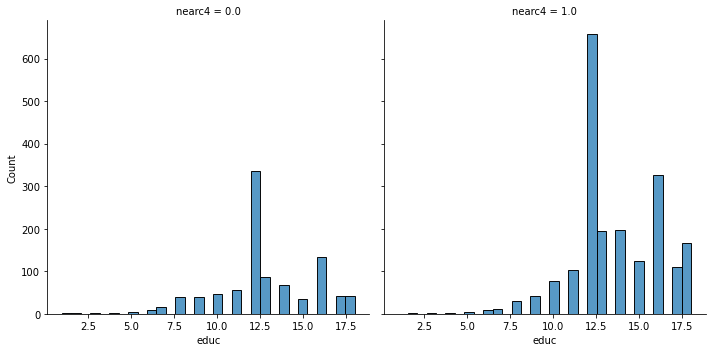

In [8]:
sns.displot(data=card, x="educ", col = "nearc4")

Se nota que aquellos que sí cuentan con un college en su condado tienen una distribución mayor en cuanto a la cantidad de años estudiados, a comparación de aquellos que no. Esto es significativamente notorio a partir de los 12 años y medio de estudio, ya que la diferencia entre un grupo y otro, en cuanto a la cantidad de personas que alcanzó este tiempo de estudios, es de casi del doble. Además, si bien ambos grupos se encuentran dentro del mismo rango de años de estudio, en el que no se exceden los 18 años, la cantidad de personas que continuaron los estudios después de los 12 años de educación es mucho menor si no cuentan con un college en su condado. Así, también se podría afirmar que la distribución de los años de educación en los histogramas indica que es mayor la cantidad de personas que vivieron en un condado con un college en él y que continuaron estudiando tras terminar la secundaria, a comparación de aquellos cuyo condado no tenía un college.

* **Grafique dos histogramas para la variable años del logaritmos de los ingresos (lwage) para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.**

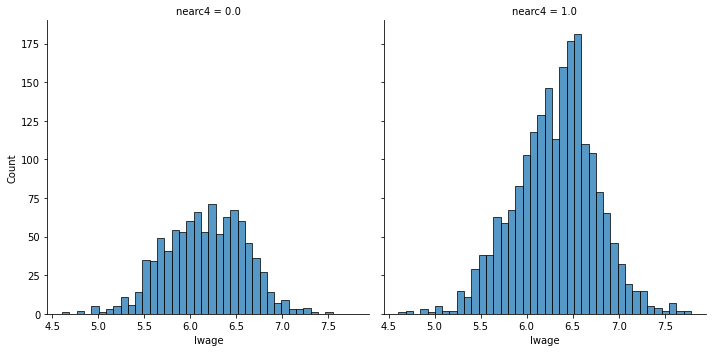

In [9]:
sns.displot(data=card, x="lwage", col = "nearc4")

Al analizar la distribución de la variable que indica los años del logaritmo de los ingresos, se puede identificar una diferencia en cuanto a los ingresos que reciben aquellos con un college en su condado, y aquellos que no, siendo mayores los ingresos del primer grupo. También se debe observar que la forma de la curva es similar en ambos grupos, teniendo la mayor concentración de los ingresos entre el rango de 6 y 6.5 en los dos casos, pero con la diferencia de que es mayor la cantidad de personas del grupo que cuentan con un college en su condado. Sin embargo, no se podría dar una conclusión fija en cuanto al efecto que tiene la presencia de un college en el condado sobre los años que estudiaron y la cantidad de ingresos que perciben; pero, a pesar de ello, estos histogramas permiten tener una primera idea de cuál podría ser la conclusión final. 

### Regresiones

* **Corran una regresión lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.**

In [10]:
#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        19:27:48   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Los resultados obtenidos reflejan, en primer lugar, que todas las variables consideradas en la regresión son significativas (por su p-value < 0.05). En segundo lugar, el coeficiente positivo de las variables educ, exper y smsa indica que el intercepto de la variable “logaritmo del salario” aumentará en la medida en que las variables anteriormente mencionadas también aumenten (por ejemplo, se nota que los ingresos aumentarán un 0.07 por cada año extra de educación). Por último, se debe resaltar que ocurrirá lo contrario con las otras variables: black, south y married (lo que indica que el salario disminuirá en cuanto se trate de personas morenas, del sur o casadas). 

* **Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2. La regressión debería tener una forma de este tipo "lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4 ]".**

In [13]:
#2SLS
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Sat, Nov 12 2022   P-value (F-stat)                0.0000
Time:                        19:30:14   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

* **Compare los resultados encontrados en la regresión de arriba. ¿Cambió el coeficiente relacionado a educ, por qué?**

En este caso (en que el instrumento es nearc2), ha aumentado el coeficiente a comparación del de la regresión anterior, ya que este resultado muestra un coefiente de 0.3618, mientras que el de la regresión OLS era de 0.0712. También se debe destacar que el coeficiente de "black" pasó de tener una relación negativa a una positiva con el nivel de ingresos. Sin embargo, se debe considerar que, en este resultado, la mayor parte de las variables consideradas en la regresión no son significativas (ya que sus p-value > 0.05, a excepción de las variables educ, la cual está justo en el margen, y exper). Así, se nota que hubo un cambio significativo en el coeficiente de la variable educ, ya que esta, en la regresión OLS, era mucho menor a 0.05 y no cabían dudas en cuanto a su nivel de significancia. Mientras que, con esta última regresión, la decisión quería en manos del investigador para considerarla como significativa por estar justo en el margen. Así, esta variable aumenta, haciéndola más relevante en esta segunda regresión (y con un aumento de salario mayor al de la primera regresión a medida que aumenten los años de estudios), pero es posible que muchos investigadores la consideren como no significativa. Respecto al motivo de este cambio, parte de este se debe al instrumental que se está usando para explicar los años de educación (que es la variable que considera qué tan cerca se vive de institutos educativos superiores de 2 años). Por último, como el F-statistic es mayor a 15, se sabe que no se está frente a un problema de un instrumento débil. 